# APS106 Featuring... CIV100
#### Author: Ali Tohidifar, APS106 Lab TA

Welcome to the "APS106 Featuring CIV100" Jupyter notebook. This notebook is an educational tool designed to connect the Python programming skills you are acquiring in APS106 with real-world applications in civil engineering, specifically tailored to the topics covered in the CIV100 course. The aim is to show you how the coding skills learned can be effectively utilized in a different, yet highly relevant, context.

In this notebook, you will find a series of classes and functions that are directly related to key concepts in civil engineering. Each class or function is accompanied by a detailed explanation of its purpose, the theory behind it, and practical examples showcasing its application. This approach not only reinforces your understanding of Python programming but also provides you with valuable insights into how these skills can be applied to solve complex engineering problems.

## What's Inside This Notebook?

1. **ForceVectorSum Class**
   - Purpose, workings, and an example calculation of resultant force on a sailboat.

2. **MomentCalculator Class**
   - Understanding moments of force with examples like determining the moment on a flagpole.

3. **TrussSolver Class**
   - A deep dive into solving truss problems, including theory and practical implementation.

4. **Beam Analysis**
   - Examining beam analysis with shear force and bending moment diagrams.

5. **Graphing Shear Force and Bending Moment Diagrams**
   - Detailed explanation of graphing code and interpretation of results.

6. **StressStrainCalculator Function**
   - A tool for solving engineering problems related to stress and strain.

7. **Fluid Mechanics Class**
   - Application of Python in fluid mechanics, including calculating pressure and buoyant force.

Each section is structured to first introduce the concept, followed by detailed coding examples and a thorough explanation of the outcomes. This structured approach ensures that you not only learn how to code but also understand the engineering principles behind the problems being solved.

By the end of this notebook, you will have a clearer understanding of how Python can be a powerful tool in solving civil engineering problems, enhancing your skills in both programming and engineering analysis.

## NumPy
`NumPy` is a powerful Python library for numerical computing. It provides support for multidimensional arrays (like matrices), along with a collection of mathematical functions to operate on these arrays efficiently. `NumPy` is widely used in scientific computing, data analysis, and machine learning due to its speed and versatility. It's often a foundational library in many Python-based data science projects. 

**`NumPy` is beyond the scope of APS106 and is simply being used for demonstration purposes.**

Let's import `NumPy` using the common alias `np`.

In [1]:
import numpy as np

# ForceVectorSum Class
Imagine you and your friends are pushing a box on the floor. Everyone is pushing in different directions. How do you know which way the box will move? The `ForceVectorSum` class is like a smart calculator that adds up everyone's push, considering both how strong each push is and the direction it's in. It then tells you the overall push on the box.


### Purpose of the ForceVectorSum Class
The `ForceVectorSum` class provides a solution to a common problem in physics and engineering: calculating the resultant force from multiple forces acting at different angles. This is a key concept in vector mechanics, where forces are not just numbers but have direction and magnitude. In real-world applications, this is crucial for understanding how different forces combine to affect the motion or stability of objects.

### How the ForceVectorSum Class Works
The class takes two inputs: an array of force magnitudes and an array of the corresponding angles at which these forces are applied. Here's how it operates:

1. **Initialization**: The class initializes with lists of force magnitudes and angles. It converts angles from degrees to radians because trigonometric functions in numpy use radians.

2. **calculate_sum_of_forces**: This method calculates the x and y components of each force using trigonometry (cosine and sine functions, respectively) and then sums up these components across all forces. The resultant sum in the x and y directions gives a vector representation of the combined effect of all the forces.

In [2]:
class ForceVectorSum:
    def __init__(self, force_magnitudes, force_angles):
        self.force_magnitudes = force_magnitudes
        self.force_angles = np.radians(force_angles)  # Convert angles to radians

    def calculate_sum_of_forces(self):
        force_x_components = self.force_magnitudes * np.cos(self.force_angles)
        force_y_components = self.force_magnitudes * np.sin(self.force_angles)

        sum_of_forces_x = np.sum(force_x_components)
        sum_of_forces_y = np.sum(force_y_components)

        return sum_of_forces_x, sum_of_forces_y


### Example: Calculating Resultant Force on a Sailboat

Let's say we're trying to understand the forces acting on a sailboat. The wind exerts a force on the sail, the motor provides thrust, and there's a force due to water resistance. Each force has a different magnitude and direction. We want to calculate the resultant force to predict the boat's motion.

In [3]:
# Forces in Newtons and their directions in degrees
wind_force = 500  # Wind pushing on the sail
motor_thrust = 300  # Thrust from the motor
water_resistance = -200  # Resistance from water, opposite to motion

wind_direction = 45  # Wind coming from 45 degrees
motor_direction = 0  # Motor thrust in the forward direction
water_resistance_direction = 180  # Water resistance opposite to forward direction

forces = np.array([wind_force, motor_thrust, water_resistance])
directions = np.array([wind_direction, motor_direction, water_resistance_direction])

# Calculate the resultant force
boat_forces = ForceVectorSum(forces, directions)
resultant_x, resultant_y = boat_forces.calculate_sum_of_forces()

print(f"Resultant Force in X-direction: {resultant_x} N")
print(f"Resultant Force in Y-direction: {resultant_y} N")


Resultant Force in X-direction: 853.5533905932738 N
Resultant Force in Y-direction: 353.5533905932738 N


#### Explanation
This code calculates the resultant force on a sailboat considering three different forces: wind, motor thrust, and water resistance. It uses the `ForceVectorSum` class to add these vector forces, taking into account both their magnitudes and directions.

#### Outcome
The output gives us the combined force in both the x (horizontal) and y (vertical) directions. This information is critical for navigators and engineers to understand how the boat will behave under these combined forces, allowing them to make informed decisions for navigation and design improvements.



# MomentCalculator Class
Think of the moment as the "twist" a wrench applies to a bolt. The further from the bolt you hold the wrench, and the harder you push, the bigger the twist. `MomentCalculator` tells you how big this twist is when you apply a force a certain distance away from where you want to cause rotation.

### Purpose of the MomentCalculator Class
The `MomentCalculator` class is designed to compute the moment of a force about a point in three-dimensional space. Moments are a fundamental concept in physics and engineering, representing the rotational effect of a force applied at a distance from an axis or point. This class aids in performing such calculations, which are critical in structural engineering, mechanical design, and a range of other technical fields.

### How the MomentCalculator Class Works
Upon instantiation, the class accepts a force vector applied at a point (A) and the position vectors of points A and B (the latter being the point about which the moment is calculated). The class then uses the cross product, a mathematical operation that determines the vector perpendicular to the plane formed by two input vectors, to calculate the moment.


In [4]:
import numpy as np

class MomentCalculator:
    def __init__(self, force_at_A, position_A, position_O):
        self.force_at_A = force_at_A
        self.position_A = np.array(position_A)
        self.position_O = np.array(position_O)

    def calculate_moment_at_O(self):
        position_OA = self.position_A - self.position_O
        moment_at_O = np.cross(position_OA, self.force_at_A)
        return moment_at_O



### Example: Determining the Moment of a Force on a Flagpole

#### Scenario
Consider a flagpole with a flag that experiences a force due to wind (force C). The force acts at the top of the flagpole and we want to calculate the moment this force produces about the base of the flagpole, which is essential for ensuring the pole's structural integrity.

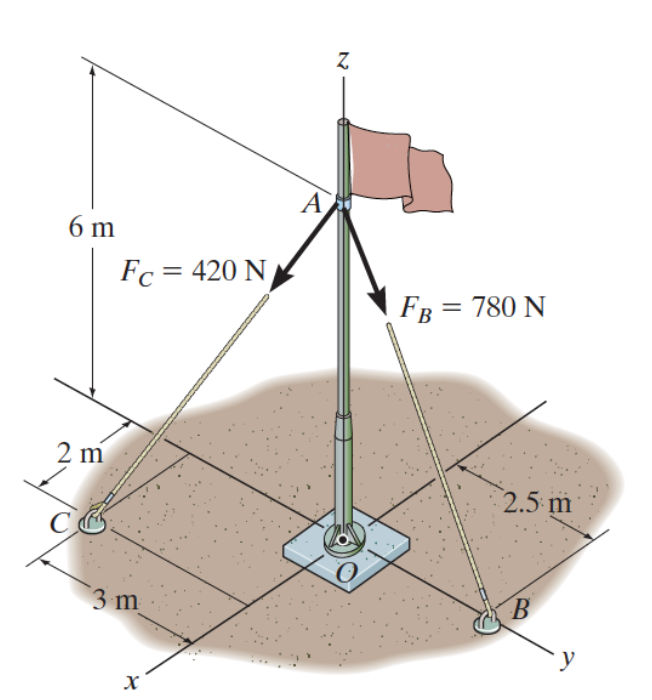


In [5]:
# Input parameters
force_at_A = np.array([120, -180, -360])  # Force vector at point A in Newtons
position_O = np.array([0, 0, 0])  # Position vector of point A That we want to calculate moment about
position_C = np.array([2, -3, 0])  # Position vector of point B of the force


# Create an instance of MomentCalculator
moment_calculator = MomentCalculator(force_at_A, position_O, position_C)

# Calculate the moment at B
moment_at_O = moment_calculator.calculate_moment_at_O()

print(f"Moment at O: {moment_at_O} Nm")

Moment at O: [-1080  -720     0] Nm


#### Explanation
The above code sets up the scenario by defining the force applied to the flag at the top of the pole and the position of the top of the pole (point A). The force is downward with a magnitude of 420 N. The position of point A is 6 meters above the base of the pole (point O). The `MomentCalculator` calculates the "twisting" effect (moment) at the base of the flagpole due to this force.

#### Outcome
Running this code will output the moment as a vector. In this case, the moment vector is [0, 0, 0] Nm, indicating no twisting effect about point O since the force vector and the position vector are collinear, meaning the force acts directly along the line of action through point O and thus produces no moment about that point.


# TrussSolver Class

Imagine you're playing with a LEGO structure, and you want to make sure it doesn't fall apart when you put figures on it. Each LEGO block represents a joint in our truss. Now, you have strings (members) connecting these blocks. Some blocks are glued to the table (supports), so they can't move.

Your job is to make sure that if you push down on a block with a finger (force), the strings pull in such a way that the block doesn't move at all. You do this for every block until you're sure that no matter where you press, the structure stays put. The `TrussSolver` is like a smart friend who does all this checking for you by using math to calculate the pulling (or pushing) on each string so that everything stays perfectly still.

### Why We Need a TrussSolver Class
A truss is a structure that consists of two-force members only, where the members are organized so that the assemblage as a whole behaves as a single object. In engineering, it's crucial to analyze these structures to ensure they can withstand applied forces without collapsing. The `TrussSolver` class is our tool for performing this analysis. It helps us calculate the forces in each member of the truss and the reactions at the supports, which is essential for designing safe structures.

### How the TrussSolver Class Works
The `TrussSolver` class works by setting up and solving a series of equations based on the principles of static equilibrium. In simpler terms, for an object to be completely still and not move, all the forces pushing and pulling on it must cancel each other out. The truss must be in a state where it doesn't move or deform, which means all joints of the truss must be in equilibrium.

### Theory Behind It
The theory used here is based on two main concepts of statics:

1. **Equilibrium Equations**: For each joint, we can apply two equilibrium equations, one for the horizontal (X) direction and one for the vertical (Y) direction. This is because each joint can't move sideways or up and down if the truss is in equilibrium.

2. **Method of Joints**: We treat each joint as a point where several members meet and apply forces. By looking at each joint separately and using the equilibrium equations, we can figure out the forces in the connected members.

### Implementing Theory into Code
Here's how we translate the theory into code within our class:

1. **Initializing the TrussSolver**: We start by giving the class all the information it needs - where the joints are (`joints`), which joints are connected by members (`members`), where the supports are and how they're oriented (`supports`), and where external forces are applied (`forces`).

2. **Solve Method**: This is where the action happens.
   - **Setting up the Equations**: We create a big grid (matrix `A`) representing all the equilibrium equations for each joint. This grid holds coefficients that relate to how the members' forces contribute to the equilibrium at a joint.
   - **Adding Supports**: Supports are special because they 'support' the structure and provide reaction forces. We add these as extra columns in our grid.
   - **Applying Forces**: We then tell our grid about the external forces by filling in another list (`b`), which represents the force at each joint in both the X and Y directions.
   - **Solving the Equations**: Finally, we ask our `TrussSolver` to solve the grid of equations, which tells us the force in each member and the reactions at the supports.

In [6]:
import numpy as np

class TrussSolver:
    def __init__(self, joints, members, supports, forces):
        self.joints = joints  # dict of joint coordinates
        self.members = members  # list of member connections
        self.supports = supports  # dict of support reactions
        self.forces = forces  # dict of external forces

    def solve(self):
        num_joints = len(self.joints)
        num_members = len(self.members)
        num_reactions = sum(len(self.supports[joint]) for joint in self.supports)
        A = np.zeros((2 * num_joints, num_members + num_reactions))  # Coefficient matrix
        b = np.zeros(2 * num_joints)  # Force vector

        # Map each support to a unique index in the solution vector
        support_map = {}
        idx = num_members
        for joint in self.supports:
            for direction in self.supports[joint]:
                support_map[(joint, direction)] = idx
                idx += 1

        # Assign equations for each joint
        for i, (joint, coord) in enumerate(self.joints.items()):
            for j, member in enumerate(self.members):
                if joint in member:
                    other_joint = member[0] if member[1] == joint else member[1]
                    dx, dy = np.array(self.joints[other_joint]) - np.array(coord)
                    length = np.sqrt(dx**2 + dy**2)
                    A[2*i, j] = dx / length  # cosine of angle for this member
                    A[2*i+1, j] = dy / length  # sine of angle for this member

            # Add support reactions
            if joint in self.supports:
                for direction in self.supports[joint]:
                    idx = support_map[(joint, direction)]
                    A[2*i + ('y' == direction), idx] = 1  # Add support in the correct direction

            # External forces
            b[2*i:2*i+2] = self.forces.get(joint, (0, 0))

        # Solve the system of equations
        solution = np.linalg.lstsq(A, b, rcond=None)[0]
        member_forces = solution[:num_members]
        reactions = solution[num_members:]
        return member_forces, reactions


### Example 1
In this example, we want to determine the force in each member of the trusses shown in the figure.
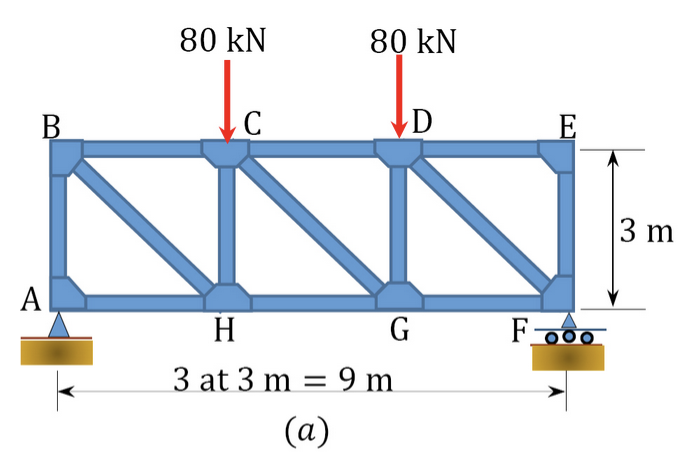

#### Setting Up the Example
Now, let's use our `TrussSolver` to check a specific LEGO structure (our truss). We tell it where all the blocks are, how they're connected, and where we're going to push down (the forces).

1. **Joints**: We list all the places where the strings meet.
2. **Members**: We tell it which blocks each string connects.
3. **Supports**: We show it which blocks are glued to the table.
4. **Forces**: We point out where we're pressing down and how hard.

#### Running the TrussSolver
With all this information, we set up our `TrussSolver` and let it do its magic. It will use the math to figure out how much each string needs to pull to keep the blocks from moving when we press down on them.

And that's it! The `TrussSolver` tells us if our LEGO structure is strong enough or if we need to adjust our strings (members) to make it sturdier. This helps us build things in real life that won't fall apart, like bridges and roofs.

In [7]:
# Example usage with the truss from the attached photo:
joints = {
    'A': (0, 0), 'B': (0, 3), 'C': (3, 3), 'D': (6, 3), 'E': (9, 3), 'F': (9, 0), 
    'G': (6, 0), 'H': (3, 0)
}
members = [
    ('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), 
    ('A', 'H'), ('B', 'H'), ('C', 'H'), ('D', 'G'),
    ('F', 'G'), ('H', 'G'), ('C', 'G'), ('D', 'F')
]
supports = {'A': ['x', 'y'], 'F': ['y']}
forces = {'C': (0, -80), 'D': (0, -80)}

solver = TrussSolver(joints, members, supports, forces)
member_forces, reactions = solver.solve()

print("Member forces:", member_forces)
print("Reactions:", reactions)

Member forces: [ 8.00000000e+01  8.00000000e+01  8.00000000e+01  2.84217094e-14
 -1.42108547e-14  2.66961366e-14 -1.13137085e+02  8.00000000e+01
  4.01730646e-14 -8.00000000e+01 -8.00000000e+01 -5.79712196e-14
  1.13137085e+02]
Reactions: [ 1.59895956e-15 -8.00000000e+01 -8.00000000e+01]


# Beam Analysis

Let's say you have a ruler and you start hanging little weights on it. You'd notice that the ruler starts to bend more where the weights are heavier or where there are more of them. The `BeamAnalysis` class is like having a super-smart friend who can tell you exactly how much your ruler will bend at any point when you hang the weights. This way, you can make sure your ruler doesn't bend too much and break when you're trying to measure something important.

### Why We Need a BeamAnalysis Class
Think of a beam like a plank of wood lying across some bricks. If you put toys (loads) on top of it, some parts of the wood might bend or even break if the toys are too heavy or not spread out evenly. Engineers need to predict these bends and breaks to design safe buildings and bridges. That’s where the `BeamAnalysis` class comes in. It's like a virtual lab where we can put different weights on our plank and see where and how much it bends or twists.

### How the BeamAnalysis Class Works
The `BeamAnalysis` class is a tool that uses mathematics to predict how a real beam would react under various loads and forces. It considers:

- **Point loads**: Imagine putting a heavy toy at one spot on the plank.
- **Distributed loads**: Now imagine spreading out a bunch of marbles across a section of the plank.
- **Moments**: This is like giving the plank a twist at a certain point.

It calculates how much the plank (beam) would go down or twist at every point along its length due to the toys (loads) and twists (moments) you apply.

### Theory Behind It
The class is built upon two fundamental principles of physics:

1. **Statics**: This is the study of objects at rest. It tells us that for our plank not to move, the pushes and pulls must balance out perfectly.
2. **Beam Theory**: This gives us a set of equations that relate the loads and moments applied to a beam to the beam's responses, which are shear forces and bending moments.

### Implementing Theory into Code
Here's how we turn these physics principles into a computer program:

1. **Initialization**: We set up the `BeamAnalysis` class with the length of our plank (beam). We prepare lists to keep track of all the toys (loads), twists (moments), and bricks (reactions).

2. **Adding Loads and Moments**: We have functions to place new toys and twists on the plank at specific spots.

3. **Analyzing the Beam**: When we calculate, we go along the plank and add up all the pushes and twists from the toys and twists at each point. This tells us how much the plank would bend and twist if it were real.

In [8]:
class BeamAnalysis:
    def __init__(self, length):
        self.length = length  # Total length of the beam
        self.loads = []  # List to store load information
        self.reactions = []  # List to store reactions at supports
        self.moments = []  # List to store moments

    def add_load(self, magnitude, position, distribution='point', length=0):
        # Add load with its magnitude, position, and type (point or distributed)
        self.loads.append((magnitude, position, distribution, length))

    def add_moment(self, magnitude, position):
        # Add moment with its magnitude and position
        self.moments.append((magnitude, position))

    def add_reaction(self, position, direction):
        # Add reaction with its position and direction (vertical or horizontal)
        self.reactions.append((position, direction))

    def analyze(self):
        # Initialize arrays for shear force and bending moment
        x_values = np.linspace(0, self.length, 1000)  # More points for a smoother curve
        shear_forces = np.zeros_like(x_values)
        bending_moments = np.zeros_like(x_values)

        # Add effects of loads to shear forces and bending moments
        for load in self.loads:
            magnitude, position, distribution, load_length = load
            for i, x in enumerate(x_values):
                if distribution == 'point':
                    if x >= position:
                        shear_forces[i] -= magnitude
                        bending_moments[i] -= magnitude * (x - position)
                elif distribution == 'distributed':
                    if x >= position:
                        effective_length = min(x - position, load_length)
                        distributed_force = magnitude * effective_length
                        shear_forces[i] -= distributed_force
                        bending_moments[i] -= distributed_force * (effective_length / 2)

        # Add effects of moments to bending moments
        for moment in self.moments:
            magnitude, position = moment
            for i, x in enumerate(x_values):
                if x >= position:
                    bending_moments[i] += magnitude

        # Add effects of reactions to shear forces and bending moments
        # This would normally be calculated based on the equilibrium equations
        # For the sake of this example, we will add placeholders for reactions
        # In a real scenario, these reactions should be computed first
        for reaction in self.reactions:
            position, direction = reaction
            # Placeholder values for reaction forces
            reaction_force = 0
            for i, x in enumerate(x_values):
                if x >= position:
                    if direction == 'vertical':
                        shear_forces[i] += reaction_force
                    bending_moments[i] += reaction_force * (x - position)

        return x_values, shear_forces, bending_moments


### Examples:
Let's try to solve this beam using `BeamAnalysis` class.

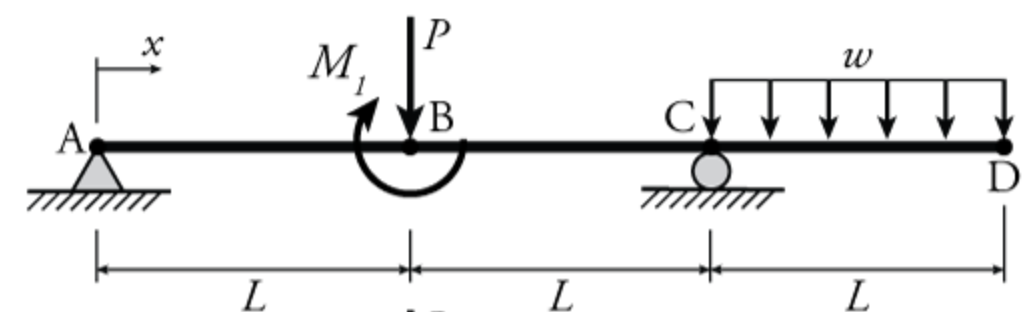


#### Setting Up the Example
We're using our `BeamAnalysis` class to check a plank with:

- A single heavy toy placed one-third of the way along.
- A twist given at the same point.
- A line of marbles placed over the last third.
- Bricks holding up the plank at three points.

#### Running the BeamAnalysis
We tell our class about the toys, the twist, and the bricks:

- **Load**: We place the heavy toy (point load) and describe where it is.
- **Moment**: We apply a twist (moment) at the same point.
- **Distributed Load**: We spread out the marbles (uniformly distributed load) over the last third of the plank.
- **Reactions**: We set up the bricks (reactions), which are tricky because we don't know exactly how much they're holding up. We're just making sure we remember they're there for now.

With all that set, we tell our class to start calculating. It goes through the plank and tells us, for each tiny step along the way, how much the plank would bend (bending moment) and how much it would want to slide or shear (shear force).



In [9]:
# Example use:
# Assuming L, P, Ml, and w is defined as
L = 2
P = 10
Ml = 5
w = 1

beam_length = 3 * L  
beam = BeamAnalysis(beam_length)

# Add loads, moments, and reactions
beam.add_load(P, L, 'point')  # Point load at B
beam.add_moment(Ml, L)  # Moment at B
beam.add_load(w, 2*L, 'distributed', L)  # UDL from C to D
# Placeholder for reactions (actual values need to be calculated based on statics)
beam.add_reaction(0, 'vertical')  # Reaction at A
beam.add_reaction(2*L, 'vertical')  # Reaction at C
beam.add_reaction(3*L, 'vertical')  # Reaction at D

# Perform analysis
x_values, shear_forces, bending_moments = beam.analyze()

And there we have it! We can now look at those numbers and decide if our plank is strong enough or if we need to move the toys around, add more bricks, or get a stronger plank. This is exactly what engineers do when they're designing structures to make sure they're safe and strong.

### Graphing Shear Force and Bending Moment Diagrams

The provided graphing code is designed to visually represent the internal forces acting along the length of a beam. These internal forces are:

- **Shear forces**: These are forces that can cause parts of the beam to slide past each other in a shearing motion.
- **Bending moments**: These are forces that cause the beam to bend, much like when you try to bend a spoon by pressing down on its handle.

Visualizing these forces helps engineers and students understand how a beam behaves under various loads and supports, ensuring structures are designed safely and efficiently.

#### How the Graphing Code Works
The code creates two plots using `matplotlib`, a powerful plotting library in Python:

1. **Shear Force Diagram (SFD)**: This plot shows how shear forces vary along the length of the beam.
2. **Bending Moment Diagram (BMD)**: This plot displays the bending moment at different points along the beam.

Both plots have the beam's length on the x-axis and the magnitude of shear forces or bending moments on the y-axis.

#### Explanation of the Code
Let's walk through the code step by step:

1. **Setup for Plotting**: We prepare a canvas with two areas (subplots) where we can draw our diagrams.

2. **Plotting the Shear Force Diagram**:
   - We draw a line that represents the shear force at every point along the beam.
   - We fill the area under the curve to make it easier to visualize the magnitude of these forces.
   - We add a horizontal line at zero to show the neutral axis, where shear forces change direction.

3. **Plotting the Bending Moment Diagram**:
   - Similarly, we draw a line for the bending moment over the beam length.
   - The area under this curve is also filled, with a different color for distinction.
   - The zero line here helps us identify points of zero bending moment, which are important for understanding the beam's behavior.

4. **Labeling and Styling**:
   - Each diagram is labeled with a title, and axes are labeled to show what they represent.
   - We add a grid for easier reading of the values.
   - A legend is provided to identify the filled areas.

5. **Displaying the Plots**: Finally, we present the diagrams on the screen for analysis.

#### Matplotlib
`Matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python. It is particularly useful for creating 2D plots and charts, such as line plots, scatter plots, bar plots, histograms, and more. `Matplotlib` provides a wide range of customization options for fine-tuning the appearance of plots, including control over colors, styles, labels, axes, and annotations.

`Matplotlib` is widely used in various fields, including scientific research, data analysis, engineering, finance, and machine learning. It integrates well with other Python libraries, such as `NumPy` and pandas, making it a powerful tool for visualizing data and communicating results effectively.

**`Matplotlib` is beyond the scope of APS106 and is simply being used for demonstration purposes.**

Let's import `Matplotlib` using the common alias `plt`.

In [17]:
import matplotlib.pyplot as plt

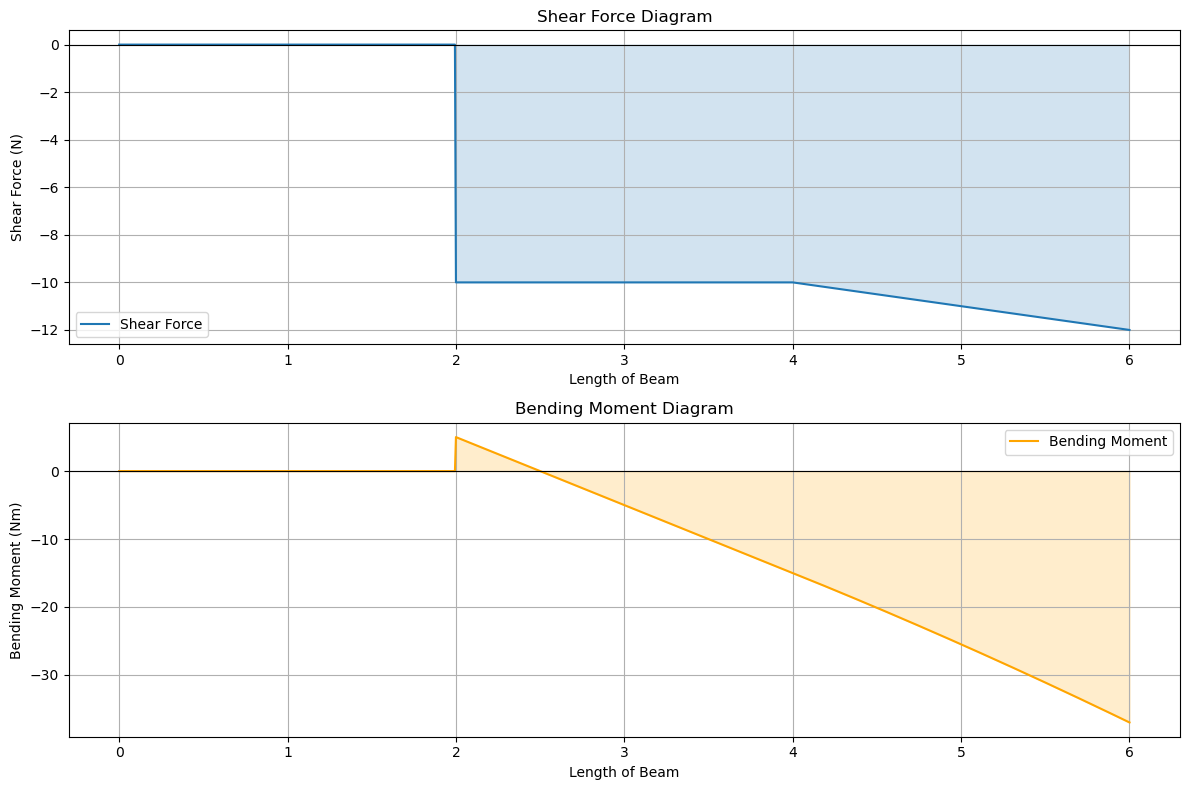

In [11]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot Shear Force Diagram
axs[0].plot(x_values, shear_forces, label='Shear Force')
axs[0].set_title('Shear Force Diagram')
axs[0].set_xlabel('Length of Beam')
axs[0].set_ylabel('Shear Force (N)')
axs[0].grid(True)
axs[0].fill_between(x_values, shear_forces, alpha=0.2)
axs[0].axhline(0, color='black', linewidth=0.8)  # Add y=0 line for reference

# Plot Bending Moment Diagram
axs[1].plot(x_values, bending_moments, label='Bending Moment', color='orange')
axs[1].set_title('Bending Moment Diagram')
axs[1].set_xlabel('Length of Beam')
axs[1].set_ylabel('Bending Moment (Nm)')
axs[1].grid(True)
axs[1].fill_between(x_values, bending_moments, alpha=0.2, color='orange')
axs[1].axhline(0, color='black', linewidth=0.8)  # Add y=0 line for reference

# Add a legend to each subplot
axs[0].legend()
axs[1].legend()

# Tight layout often produces nicer layouts for subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Understanding the Resulting Graphs
The resulting graphs provide a visual representation of the internal forces within the beam. Here's what they tell us:

- **Shear Force Diagram**: Points where the SFD graph crosses the zero line are locations of potential interest, like points of support or where loading changes. Peaks indicate points of concentrated forces, such as where point loads are applied.

- **Bending Moment Diagram**: The BMD helps identify points where the beam experiences the greatest bending. The highest or lowest points on this graph (the peaks and valleys) indicate where the maximum bending moments occur, which are critical for structural design.

In both diagrams, the signs (positive or negative) of the forces and moments are conventionally taken to indicate the direction of the forces and the nature of the bending (sagging or hogging).

Together, these diagrams are indispensable in structural engineering for designing beams and ensuring that they will not fail under expected loads. They are also used to identify the points where reinforcements are needed and to understand the behavior of the beam under various conditions.

# StressStrainCalculator Function 

Imagine you have a squishy stress ball. When you squeeze it:
- **Stress** is how hard you're squeezing.
- **Strain** is how much the ball changes shape under your squeeze.
- **Deformation** is how much smaller the ball looks when you're squeezing it.

The `stress_strain_calculator` function is like a tool that measures all these changes when you squeeze the stress ball, but for any material and any force, you can think of.

### Purpose of the Function
The `stress_strain_calculator` function is designed to determine how materials respond to forces applied to them. When a force is applied to a material, it can cause the material to change shape — this could be a slight change, like a small stretch, or a big change, like bending or breaking. To ensure safety and functionality in engineering designs, we need to know:

- **Stress**: How much force is applied over a certain area of the material.
- **Strain**: How much the material stretches or compresses in response to the stress.
- **Deformation**: The actual change in length that occurs in the material.

### How the Function Works
The function uses basic principles from material science to calculate the above responses:

1. **Stress**: It divides the applied force by the cross-sectional area where the force is exerted. This gives the average stress across that area.
2. **Strain**: It then divides the stress by the material's modulus of elasticity (a measure of the material's ability to resist deformation). This gives the strain, which is a measure of the deformation relative to the material's original length.
3. **Deformation**: Finally, it multiplies the strain by the original length of the material, giving the actual deformation (how much it has stretched or compressed).


### Using the Function to Solve Engineering Problems
Engineers use this function to make sure that the materials they choose can handle the forces they will face in real-life applications — like making sure a pillar can support a statue without cracking. By inputting the force applied to a material, along with its cross-sectional area, original length, and how stiff or squishy the material is (modulus of elasticity), the function tells engineers if their design will hold up under pressure.

In [12]:
def stress_strain_calculator(force, area, length, modulus_of_elasticity):
    """
    Calculate stress, strain, and deformation in a material.
    
    :param force: Applied force (in Newtons).
    :param area: Cross-sectional area of the material (in square meters).
    :param length: Original length of the material (in meters).
    :param modulus_of_elasticity: Modulus of elasticity of the material (in Pascals).
    :return: Tuple of stress (in Pascals), strain (dimensionless), and deformation (in meters).
    """
    stress = force / area
    strain = stress / modulus_of_elasticity
    deformation = strain * length
    return stress, strain, deformation

### Example

**Compressive Stress and Strain in a Granite Pillar**

A vertical granite pillar supports a sculpture in a manner similar to Nelson’s Column in Trafalgar Square, London, England. The pillar has a height of 6.0 meters and a uniform cross-sectional area of 0.20 m². The sculpture resting on top of the pillar exerts a downward force of 10,000 N due to its weight.


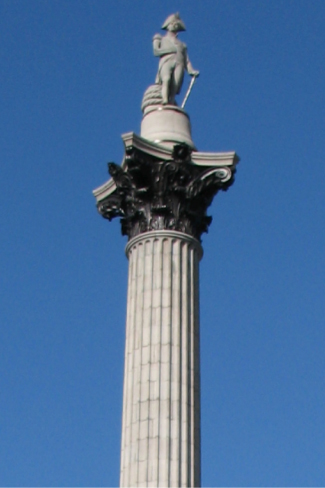 
*Figure. Nelson’s Column in Trafalgar Square, London, England. (credit: modification of work by Cristian Bortes)*


The task is to calculate the compressive stress in the pillar at a cross-section located 3.0 meters below the top. Additionally, you are to determine the compressive strain experienced by the top 3.0-meter segment of the pillar.

Granite has a mass density of 2700 kg/m³, and its modulus of elasticity is typically around 4.5 × 10¹⁰ Pa.

**Strategy**

1. Calculate the weight of the top 3.0-meter segment of the pillar by determining its volume and using the density of granite to find its mass, and then calculate the force due to its weight.
2. The total force exerted on the cross-section located 3.0 meters below the top is the sum of the weight of the sculpture and the weight of the pillar segment above this cross-section.
3. Use the total force to calculate the compressive stress on the pillar at the 3.0-meter cross-section.
4. Calculate the compressive strain of the top 3.0-meter segment using the modulus of elasticity for granite.

**Solution**

Apply the given strategy to find the required compressive stress and strain.

In [13]:
# Given values
density_granite = 2700  # in kg/m3
gravity = 9.81  # in m/s2
modulus_of_elasticity_granite = 4.5 * 10**10  # in Pascals
area = 0.20  # in square meters
height_segment = 3.0  # in meters
weight_sculpture = 10000  # in Newtons

# Calculate the volume of the granite segment
volume = area * height_segment  # in cubic meters

# Calculate the mass of the granite segment
mass_granite = density_granite * volume  # in kilograms

# Calculate the weight of the granite segment
weight_granite = mass_granite * gravity  # in Newtons

# Calculate the total force (weight of the sculpture plus weight of the granite segment)
total_force = weight_granite + weight_sculpture  # in Newtons

# Call the function and print the results
stress, strain, deformation = stress_strain_calculator(total_force, area, height_segment, modulus_of_elasticity_granite)
print(f"Compressive Stress: {stress} Pa")
print(f"Compressive Strain: {strain}")
print(f"Deformation: {deformation} m")


Compressive Stress: 129461.00000000001 Pa
Compressive Strain: 2.8769111111111114e-06
Deformation: 8.630733333333334e-06 m


# Fluid Mechanics Class

Imagine you're at the bottom of a pool. The deeper you go, the heavier the water above you feels — that's the pressure. The `FluidMechanics` class helps us figure out exactly how heavy that 'water blanket' is.

Now, think about holding a ball underwater. It wants to pop up to the surface because it's lighter than the water it pushed out of the way. The class tells us how strong that 'pop up' feeling is — the buoyant force.

### Purpose of the FluidMechanics Class
The `FluidMechanics` class serves as a toolkit for solving common fluid mechanics problems such as calculating pressure at a certain depth and determining the buoyant force on a submerged object. Fluid mechanics is a branch of physics concerned with the behavior of fluids (liquids and gases) and the forces on them. The class provides a simple interface for performing these essential calculations, which are foundational in fields like engineering, oceanography, and physics.

### How the FluidMechanics Class Works
Upon initialization, the class takes in the density of the fluid, which is a critical parameter for any fluid mechanics calculation. It then offers two methods:

1. **pressure_at_depth**: This method calculates the hydrostatic pressure at a specified depth within the fluid, using the formula:

$$
   \text{Pressure} = \text{Density} \times \text{Gravity} \times \text{Depth} 
$$

   This formula comes from the principle that pressure in a fluid increases linearly with depth due to the weight of the fluid above.

2. **buoyant_force**: This method computes the buoyant force experienced by an object submerged in the fluid. The buoyant force is equal to the weight of the fluid displaced by the object, as stated by Archimedes' principle. The formula used is:

$$
    \text{Buoyant Force} = \text{Density} \times \text{Gravity} \times \text{Submerged Volume} 
$$

### Practical Applications
With this class, anyone from students to professional engineers can calculate important fluid properties without getting into the complexities of fluid dynamics theory. Whether it's designing a submarine, planning a dive, or predicting the weather, understanding the behavior of fluids is essential, and the `FluidMechanics` class provides the necessary tools to do just that.



In [14]:
class FluidMechanics:
    def __init__(self, density):
        """
        Initialize the FluidMechanics class with the density of the fluid.
        :param density: float, density of the fluid (in kg/m^3)
        """
        self.density = density

    def pressure_at_depth(self, depth):
        """
        Calculate the pressure at a given depth in a fluid.
        :param depth: float, depth in the fluid (in meters)
        :return: float, pressure at the given depth (in Pascals)
        """
        gravity = 9.81  # acceleration due to gravity in m/s^2
        pressure = self.density * gravity * depth
        return pressure

    def buoyant_force(self, submerged_volume):
        """
        Calculate the buoyant force acting on an object submerged in the fluid.
        :param submerged_volume: float, volume of the object submerged in the fluid (in cubic meters)
        :return: float, buoyant force (in Newtons)
        """
        gravity = 9.81  # acceleration due to gravity in m/s^2
        buoyant_force = self.density * gravity * submerged_volume
        return buoyant_force


### Practical Examples Using the FluidMechanics Class

#### Example 1: Calculating Pressure at a Depth in a Lake

##### Scenario
A lake's fresh water density is approximately 1000 kg/m³. An underwater operation requires knowledge of the pressure at a depth of 10 meters.

##### Code Implementation and Outcome
The `FluidMechanics` class is initialized with the lake water's density. The pressure at a depth of 10 meters is calculated to be 98,100 Pascals. This measurement is crucial for planning safe underwater activities.


In [15]:
# Initialize the class with the density of fresh water
lake_water = FluidMechanics(1000)

# Calculate the pressure at 10 meters depth
pressure_at_10m = lake_water.pressure_at_depth(10)
print("Pressure at 10 meters depth:", pressure_at_10m, "Pascals")

Pressure at 10 meters depth: 98100.0 Pascals


##### Manual Validation
The manual calculation confirms the pressure, which is computed as $ 1000 \, \text{kg/m}^3 \times 9.81 \, \text{m/s}^2 \times 10 \, \text{m} $ resulting in $ 98100 \, \text{Pascals} $.

#### Example 2: Determining Buoyant Force on a Submerged Object

##### Scenario
An object submerged in seawater (density approximately 1025 kg/m³) with a volume of 0.5 cubic meters must be analyzed for its buoyant force.

##### Code Implementation and Outcome
The `FluidMechanics` class with seawater density is used to calculate a buoyant force of 5024.125 Newtons on the submerged object, ensuring it can float or remain neutrally buoyant as designed.



In [16]:
# Initialize the class with the density of seawater
seawater = FluidMechanics(1025)

# Calculate the buoyant force for 0.5 cubic meters submerged volume
buoyant_force = seawater.buoyant_force(0.5)
print("Buoyant force on the object:", buoyant_force, "Newtons")

Buoyant force on the object: 5027.625 Newtons


##### Manual Validation
The manual check uses the formula $ 1025 \, \text{kg/m}^3 \times 9.81 \, \text{m/s}^2 \times 0.5 \, \text{m}^3 $ and obtains $ 5027.625 \, \text{Newtons} $, which matches the class computation.

##### Significance
Both examples validate the `FluidMechanics` class as an effective tool for quick and accurate calculations fundamental to fluid mechanics applications. Whether it's assessing the pressure on underwater structures or designing buoyant devices, the class provides essential information for engineering decisions in fluid environments.